In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


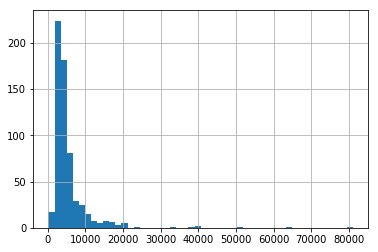

In [8]:
train['ApplicantIncome'].hist(bins=50)

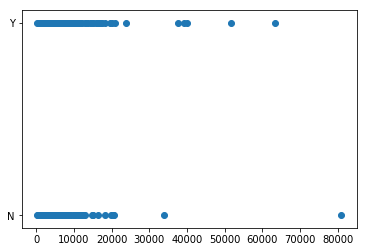

In [9]:
plt.scatter(train['ApplicantIncome'],train['Loan_Status'])

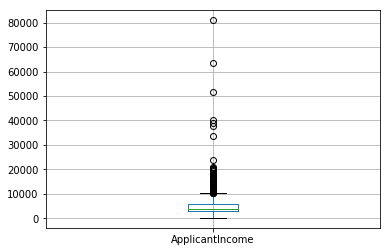

In [10]:
train.boxplot(column='ApplicantIncome')

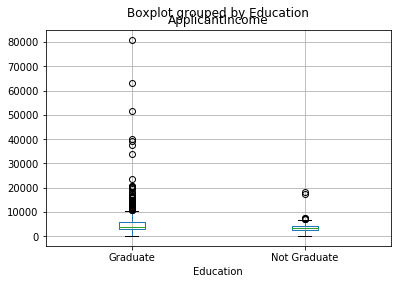

In [11]:
train.boxplot(column='ApplicantIncome', by='Education')

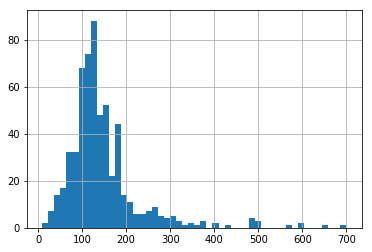

In [12]:
train['LoanAmount'].hist(bins=50)

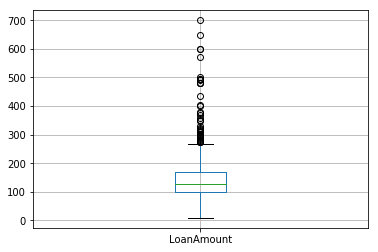

In [13]:
train.boxplot(column='LoanAmount')

In [14]:
loan_status_num = {'Y' : 1, 'N' : 0, 'Male' : 1, 'Female' : 0, 'Yes' : 1 , 'No' : 0, 'Graduate' : 1, 'Not Graduate' : 0,'Rural' : 0 ,'Semiurban' : 1, 'Urban' : 2 , '3+' : 3 }
train.replace(loan_status_num,inplace=True)
test.replace(loan_status_num,inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


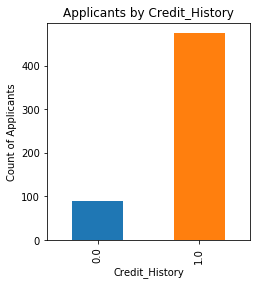

In [15]:
temp1 = train['Credit_History'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

In [16]:
train['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [17]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)

In [18]:
train['Self_Employed'].value_counts()
train['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [19]:
train['Self_Employed'].fillna('0.0',inplace=True)
train['Married'].fillna('1.0',inplace=True)
test['Self_Employed'].fillna('0.0',inplace=True)
test['Married'].fillna('1.0',inplace=True)


In [20]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [22]:
train['Gender'].fillna('1.0',inplace=True)
test['Gender'].fillna('1.0',inplace=True)

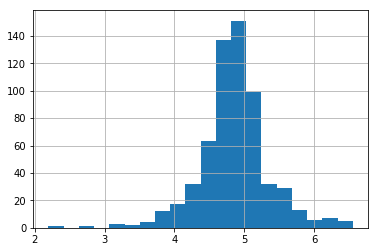

In [23]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

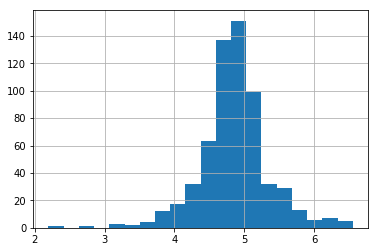

In [24]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log'] = np.log(test['TotalIncome'])
train['LoanAmount_log'].hist(bins=20) 

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           599 non-null object
Education            614 non-null int64
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
LoanAmount_log       614 non-null float64
TotalIncome          614 non-null float64
TotalIncome_log      614 non-null float64
dtypes: float64(7), int64(4), object(5)
memory usage: 76.8+ KB


In [26]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
train['Loan_Amount_Term'].fillna('360',inplace=True)
train['Credit_History'].fillna('1.0',inplace=True)
train['Dependents'].fillna('0', inplace=True)
test['Loan_Amount_Term'].fillna('360',inplace=True)
test['Credit_History'].fillna('1.0',inplace=True)
test['Dependents'].fillna('0', inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null object
Credit_History       614 non-null object
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
LoanAmount_log       614 non-null float64
TotalIncome          614 non-null float64
TotalIncome_log      614 non-null float64
dtypes: float64(5), int64(4), object(7)
memory usage: 76.8+ KB


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVC

C:\Users\Parmar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    
    prediction = model.predict(data[predictors])
    
    accuracy = metrics.accuracy_score(prediction,data[outcome])
    print("Accuracy : %s" %"{0:.3%}".format(accuracy))
    
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


In [31]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area','ApplicantIncome']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 81.967%


In [32]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 81.967%


In [33]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 81.148%


In [34]:
model = SVC()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area','Education']
classification_model(model, train,predictor_var,outcome_var)
                 

Accuracy : 81.107%
Cross-Validation Score : 81.967%


In [35]:
model = RandomForestClassifier(n_estimators=30, min_samples_split=20, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 83.388%
Cross-Validation Score : 81.967%


In [36]:
test_pred = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
test_data = test.drop("Loan_ID", axis=1).copy()
prediction = model.predict(test[test_pred])


In [37]:
submission = pd.DataFrame({
    "Loan_ID" : test['Loan_ID'],
    'Loan_Status' : prediction
    
})
submission.to_csv('submission.csv', index=False)